In [ ]:
!pip install image_slicer
!pip install pypng
!pip install Pillow
!pip install natsort

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import Model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from keras.utils import np_utils
from  keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json

from IPython.display import Image
from PIL import Image
import image_slicer
import imageio
import png

import natsort
import os
import glob
from numpy import asarray

import shutil

from PIL import Image, ImageSequence

In [ ]:
!mkdir bad_details
!mkdir good_details
!mkdir all_pictures

In [ ]:
!unzip 'Плохое_качество_10.zip' -d /content/bad_details
!unzip 'Хорошее_качество_10.zip' -d /content/good_details

Archive:  Плохое_качество_10.zip
  inflating: /content/bad_details/b_rec0003.bmp  
  inflating: /content/bad_details/b_rec0004.bmp  
  inflating: /content/bad_details/b_rec0005.bmp  
  inflating: /content/bad_details/b_rec0006.bmp  
  inflating: /content/bad_details/b_rec0007.bmp  
  inflating: /content/bad_details/b_rec0008.bmp  
  inflating: /content/bad_details/b_rec0009.bmp  
  inflating: /content/bad_details/b_rec0010.bmp  
  inflating: /content/bad_details/b_rec0011.bmp  
  inflating: /content/bad_details/b_rec0012.bmp  
Archive:  Хорошее_качество_10.zip
  inflating: /content/good_details/b_rec0540.tif  
  inflating: /content/good_details/b_rec0541.tif  
  inflating: /content/good_details/b_rec0542.tif  
  inflating: /content/good_details/b_rec0543.tif  
  inflating: /content/good_details/b_rec0544.tif  
  inflating: /content/good_details/b_rec0545.tif  
  inflating: /content/good_details/b_rec0546.tif  
  inflating: /content/good_details/b_rec0547.tif  
  inflating: /content/goo

In [ ]:
directory_path_good_detail = '/content/good_details'
n = 1
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path_good_detail, "*.tif")), reverse=False):
  img = Image.open(img_path)
  %cd /content/all_pictures
  for i, page in enumerate(ImageSequence.Iterator(img)):
    page.mode = 'I'
    page.point(lambda i:i*(1./256)).convert('L').resize((300,300)).save(f'+{n}.png')
  n += 1


directory_path_bad_detail = '/content/bad_details'
n = -1
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path_bad_detail, "*.bmp")), reverse=False):
  img = Image.open(img_path)
  img.resize((300,300)).save(f'/content/all_pictures/{n}.png')
  n -= 1

/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures
/content/all_pictures


In [ ]:
# Делаем метки
label = []
for image in natsort.natsorted(glob.glob(os.path.join('/content/all_pictures',"*.png"))):
  if int(image[22:24]) < 0:
    label.append(0)
  else:
    label.append(1)

labels_array = np.array(label)
labels_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Преобразуем изображение в нужный нам формат
directory_path_3 = '/content/all_pictures'

Data_array = np.empty((1, 300, 300))
for img_path in natsort.natsorted(glob.glob(os.path.join(directory_path_3, "*.png")), reverse=False):
  im_gray = np.array(Image.open(img_path).convert('L'))
  im_gray_array = im_gray[np.newaxis]
  Data_array = np.vstack((Data_array, im_gray_array))


Final_array = Data_array[1:labels_array.shape[0]+1]

In [ ]:
labels_array_bin = np_utils.to_categorical(labels_array, num_classes = 2)

In [ ]:
labels_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Final_array

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# делим датасет на train, validation и test
data_array_for_train_val = Final_array[:int(Final_array.shape[0]*0.5)]
labels_array_bin_for_train_val = labels_array_bin[:int(labels_array_bin.shape[0]*0.5)]

data_array_for_test = Final_array[int(Final_array.shape[0]*0.64):]
labels_array_bin_for_test = labels_array_bin[int(labels_array_bin.shape[0]*0.64):]

print(data_array_for_train_val.shape)
print(labels_array_bin_for_train_val.shape)

print(data_array_for_test.shape)
print(labels_array_bin_for_test.shape)

(10, 300, 300)
(10, 2)
(8, 300, 300)
(8, 2)


In [ ]:
img_rows = Final_array.shape[1]
img_columns =  Final_array.shape[2]
print(img_rows)
print(img_columns)

300
300


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-05)
sgd = SGD(learning_rate=1e-05)
weights_file = 'CNN_1_weights.h5'
callback = ModelCheckpoint(weights_file,
              monitor='val_accuracy',
              mode='max',
              save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

CNN = Sequential()
CNN.add(tf.keras.layers.Conv2D(64, (5,3), kernel_initializer='glorot_uniform', padding='same', strides = (3,1), dilation_rate=(1, 1), input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))
CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(tf.keras.layers.Conv2D(128, (5,3), kernel_initializer='glorot_uniform', padding='same', input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))

CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(tf.keras.layers.Conv2D(256, (5,3), kernel_initializer='glorot_uniform', padding='same', input_shape=(img_rows, img_columns, 1)))
CNN.add(BatchNormalization())
CNN.add(Activation('LeakyReLU'))

CNN.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 1)))
CNN.add(Flatten())
CNN.add(Dropout(0.5))
CNN.add(Dense(2, activation = 'softmax'))


CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 300, 64)      1024      
                                                                 
 batch_normalization_3 (Batc  (None, 100, 300, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 100, 300, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 300, 64)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 300, 128)      123008    
                                                                 
 batch_normalization_4 (Batc  (None, 50, 300, 128)    

In [ ]:
CNN.compile(optimizer=sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
history = CNN.fit(data_array_for_train_val,
                    labels_array_bin_for_train_val,
                    batch_size = 128,
                    epochs=1000,
                    validation_split=0.3,
                    verbose=1,
                    callbacks = [callback, es])

Epoch 1/1000
1/1 [==============================] - 18s 18s/step - loss: 1.1259 - accuracy: 0.4286 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 9s 9s/step - loss: 0.1518 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 7s 7s/step - loss: 0.2799 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 9s 9s/step - loss: 0.1970 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 9s 9s/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 7s 7s/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6: early stopping


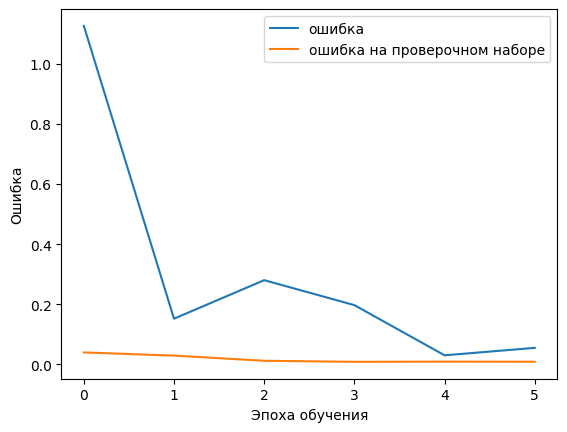

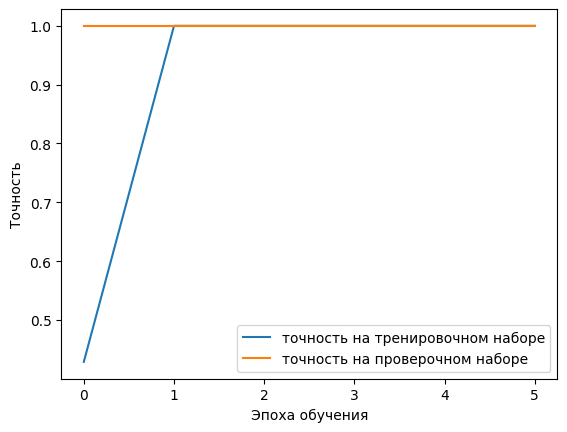

In [ ]:
                                                ### График ошибки и качества ###
plt.plot(history.history['loss'],
         label='ошибка')
plt.plot(history.history['val_loss'],
         label='ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'],
         label='точность на тренировочном наборе')
plt.plot(history.history['val_accuracy'],
         label='точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
scores = CNN.evaluate(data_array_for_test, labels_array_bin_for_test)
print(scores[1])

1/1 [==============================] - 3s 3s/step - loss: 4.4891 - accuracy: 0.0000e+00
0.0


In [ ]:
prediction = CNN.predict(data_array_for_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
prediction

array([[1.3617222e-04, 9.9986386e-01],
       [1.5574398e-04, 9.9984431e-01],
       [1.1057732e-04, 9.9988931e-01],
       [9.6756565e-05, 9.9990314e-01],
       [1.3738753e-04, 9.9986267e-01],
       [1.3060293e-04, 9.9986935e-01],
       [1.5085137e-04, 9.9984908e-01],
       [1.2817395e-04, 9.9987197e-01]], dtype=float32)

In [ ]:
labels_array_for_test = labels_array[int(labels_array.shape[0]*0.64):]
print(np.argmax(prediction,  axis=1))
print(labels_array_for_test)

[1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_array_for_test, np.argmax(prediction,  axis=1))
report = classification_report(labels_array_for_test, np.argmax(prediction,  axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       8.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.